**Author:** Boris Kundu

**Problem Model**: Telecom customer churn prediction using Tree based methods

**Dataset**: Telco-Customer-Churn.csv

In [127]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier

In [128]:
#Read data
df = pd.read_csv('Telco-Customer-Churn.csv')

In [129]:
#Check head
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [130]:
#Check data model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [131]:
#Check stats
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**Exploratory Data Analysis**

In [132]:
#Check for null values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

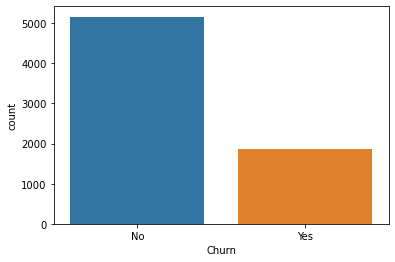

In [133]:
#Check class label 'Churn' balance
sns.countplot(data=df,x='Churn')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

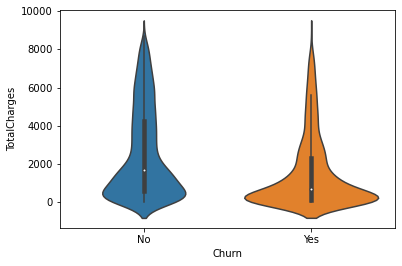

In [134]:
#Check 'TotalCharges' between 'Churn' categories
sns.violinplot(data=df, x='Churn',y='TotalCharges')

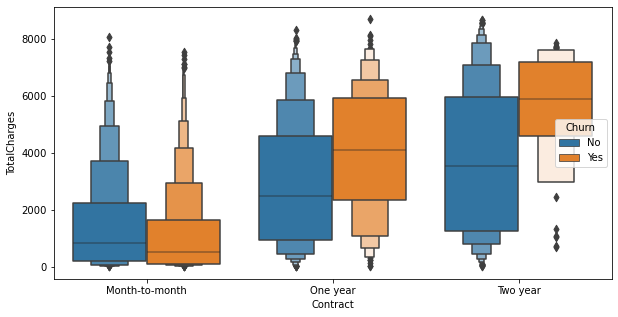

In [135]:
#Check TotalChharges per ContractType by Churn
plt.figure(figsize=(10,5))
sns.boxenplot(data=df, x='Contract',y='TotalCharges',hue='Churn')
plt.show()

In [136]:
#Check columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [137]:
#Check relevant feature corelation with Churn
cor_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [138]:
#Check head
cor_df.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982


In [139]:
#Get corrlation for Churned customers and exclude Churn
cor_df['Churn_Yes'].sort_values()[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

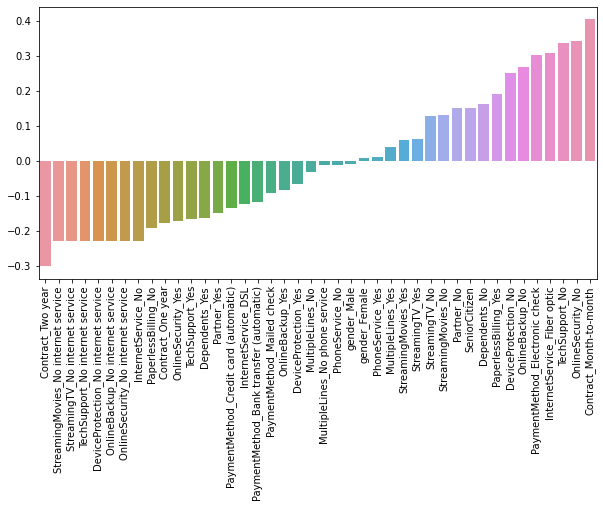

In [140]:
#Plot corelation
plt.figure(figsize=(10,5))
sns.barplot(x=cor_df['Churn_Yes'].sort_values()[1:-1].index,y=cor_df['Churn_Yes'].sort_values()[1:-1].values)
plt.xticks(rotation=90)
plt.show()

**Churn Analysis**

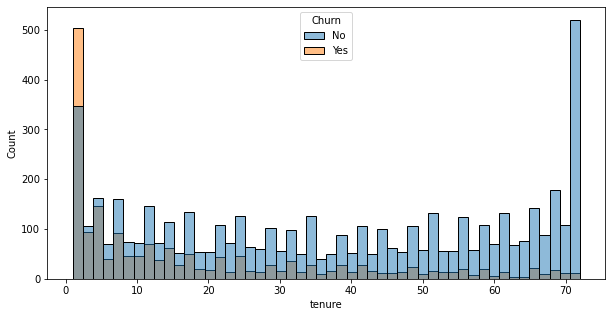

In [141]:
#Plot customer tenure
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='tenure',hue='Churn',bins=50)
plt.show()

<Figure size 720x360 with 0 Axes>

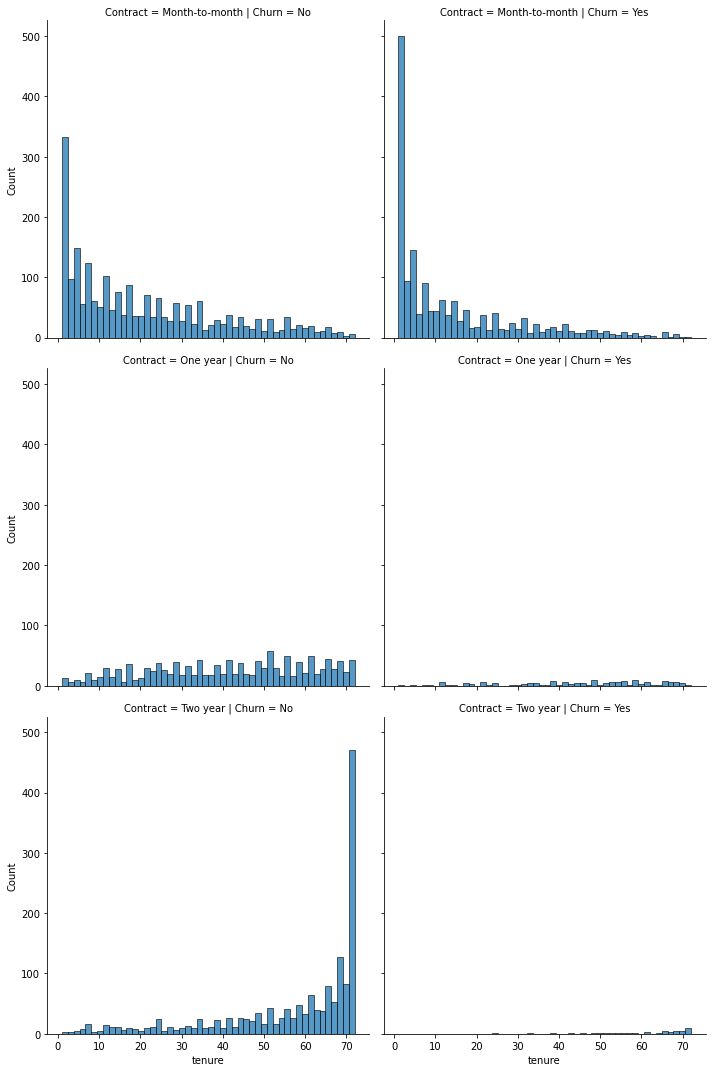

In [142]:
#Plot tenure with additional features
plt.figure(figsize=(10,5))
sns.displot(data=df,x='tenure',col='Churn',row='Contract',bins=50)
plt.show()

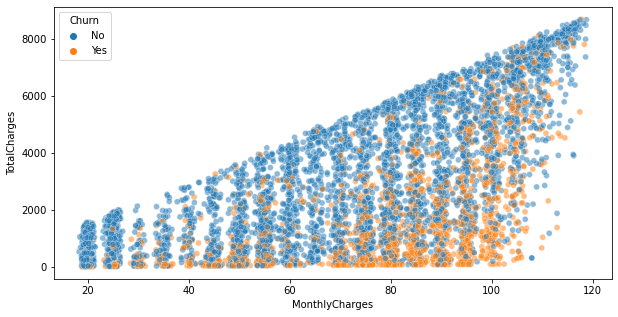

In [143]:
#Plot TotalCharges vs MonthlyCharges by Churn
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.5)
plt.show()

In [144]:
#Check Churn rate by tenture length
no_churn = df.groupby(['Churn','tenure']).count().T['No']
yes_churn = df.groupby(['Churn','tenure']).count().T['Yes']

In [145]:
#Calculate Churn rate
churn_rate = (yes_churn/(yes_churn+no_churn)) * 100

In [146]:
#Check Churn rate
churn_rate.T['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

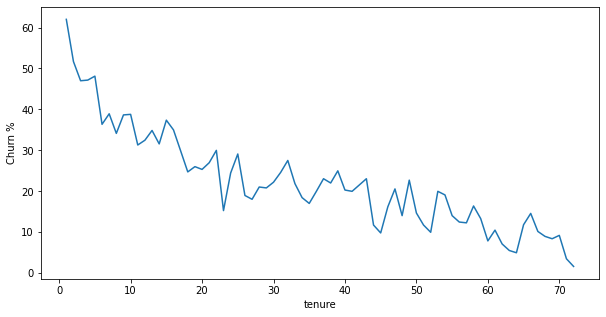

In [147]:
#Plot Churn rate
plt.figure(figsize=(10,5))
churn_rate.iloc[0].plot()
plt.ylabel('Churn %')
plt.show()

In [148]:
#Create tenure categories
def groupTenure(tenure):
    if tenure < 13:
        return 'Upto 1 year'
    elif tenure < 25:
        return '1 to 2 years'
    elif tenure < 49:
        return '2 to 4 years'
    else:
        return "More than 4 years"

In [149]:
#Create feature TenureGroup
df['TenureGroup'] = df['tenure'].apply(groupTenure)

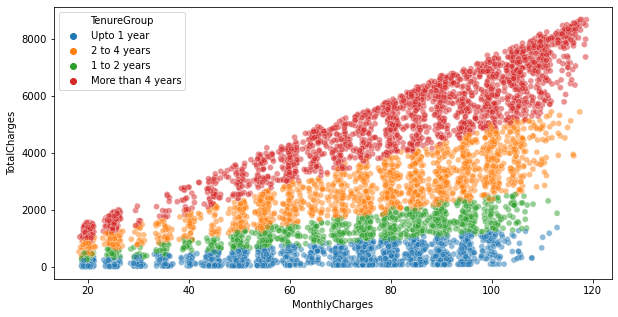

In [150]:
#Plot TotalCharges vs MonthlyCharges by TenureGroup
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='TenureGroup',alpha=0.5)
plt.show()

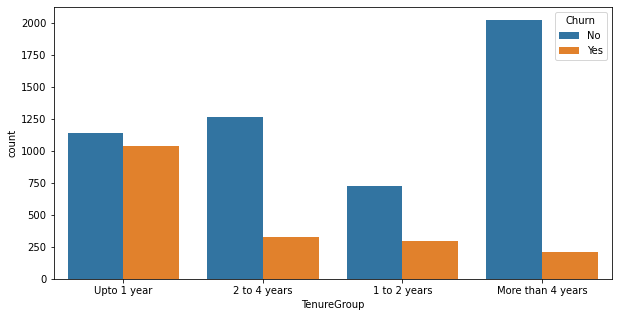

In [151]:
#Check Churn count per TenureGroup
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='TenureGroup',hue='Churn')
plt.show()

<Figure size 720x360 with 0 Axes>

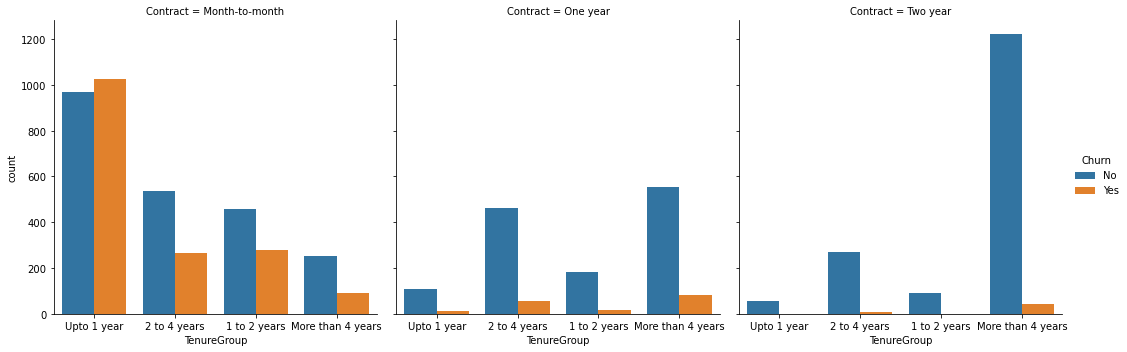

In [152]:
#Check count per TenureGroup, separated by contract type and colored by Churn
plt.figure(figsize=(10,5))
sns.catplot(data=df,x='TenureGroup',col='Contract', hue='Churn',kind='count')
plt.show()

**Predictive Modeling**

In [153]:
#Create input features
X = df.drop(['customerID','Churn'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [154]:
#Create output target
y = df['Churn']

In [155]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [156]:
#Decision Tree
dt_model = DecisionTreeClassifier(max_depth=6)

In [157]:
#Train model
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [158]:
#Predict
pred = dt_model.predict(X_test)

In [159]:
#Display report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.83      0.86      0.85      1554
         Yes       0.57      0.52      0.54       556

    accuracy                           0.77      2110
   macro avg       0.70      0.69      0.70      2110
weighted avg       0.76      0.77      0.77      2110



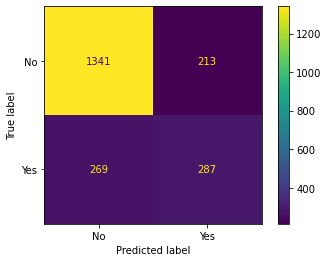

In [160]:
#Show confusion matrix
plot_confusion_matrix(dt_model,X_test,y_test)

In [161]:
#Plot important features
imp_feats = pd.DataFrame(data=dt_model.feature_importances_,index=X.columns,columns=['Significance']).sort_values("Significance")

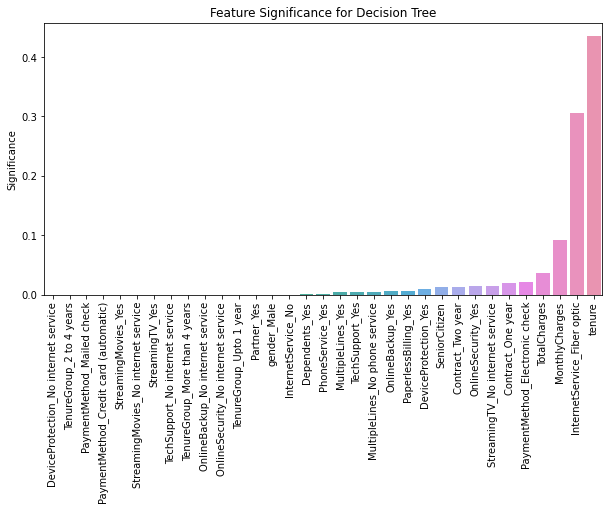

In [162]:
#Plot significance
plt.figure(figsize=(10,5))
sns.barplot(data=imp_feats.sort_values('Significance'),x=imp_feats.sort_values('Significance').index,y='Significance')
plt.xticks(rotation=90)
plt.title("Feature Significance for Decision Tree")
plt.show()

In [163]:
#Plot Tree
plt.figure(figsize=(20,10),dpi=720)
plot_tree(dt_model,filled=True,feature_names=X.columns)
plt.show()

In [164]:
#Crete and train RandomForest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train,y_train)
preds = rf_model.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1554
         Yes       0.64      0.46      0.53       556

    accuracy                           0.79      2110
   macro avg       0.73      0.68      0.70      2110
weighted avg       0.77      0.79      0.78      2110



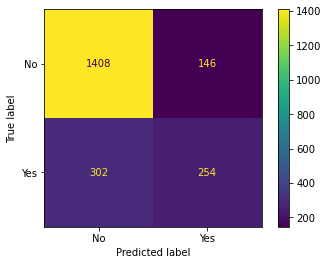

In [165]:
plot_confusion_matrix(rf_model,X_test,y_test)

In [166]:
#Ada boost model
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)
preds = ada_model.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.85      0.90      0.87      1554
         Yes       0.66      0.56      0.61       556

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



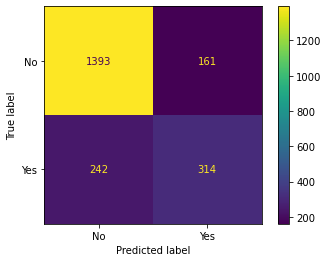

In [167]:
plot_confusion_matrix(ada_model,X_test,y_test)